In [57]:
import akshare as ak
import matplotlib.pyplot as plt

def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

asset = 10000
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 180
df = ak.fund_etf_hist_em(symbol="510300", period="daily", start_date="20150101", end_date="20230701", adjust="")
df

,日期,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,2015-01-05,3.604,3.688,3.735,3.589,30758984,1.130058e+10,4.09,3.19,0.114,15.16
1,2015-01-06,3.665,3.663,3.708,3.612,16023424,5.869771e+09,2.60,-0.68,-0.025,7.90
2,2015-01-07,3.645,3.662,3.690,3.625,17043222,6.243527e+09,1.77,-0.03,-0.001,8.40
3,2015-01-08,3.672,3.582,3.682,3.570,12361366,4.461717e+09,3.06,-2.18,-0.080,6.09
4,2015-01-09,3.572,3.556,3.725,3.542,20780563,7.508850e+09,5.11,-0.73,-0.026,10.25
...,...,...,...,...,...,...,...,...,...,...,...
2060,2023-06-26,3.866,3.843,3.870,3.831,6404956,2.462686e+09,1.00,-1.13,-0.044,3.16
2061,2023-06-27,3.842,3.869,3.879,3.835,3971021,1.532294e+09,1.14,0.68,0.026,1.96
2062,2023-06-28,3.863,3.877,3.878,3.837,4627456,1.786040e+09,1.06,0.21,0.008,2.28
2063,2023-06-29,3.877,3.859,3.879,3.847,3002626,1.159260e+09,0.83,-0.46,-0.018,1.48


In [58]:
for price in df.收盘:
    days -= 1
    if days < 0:
        money, stock = rebalance(asset, price)
        days = interval
    stock_p = stock * price
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    if allin_stock == 0:
        allin_stock = 10000 / price
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)

11606.810160149382
12293.55041906846
10526.030368763557


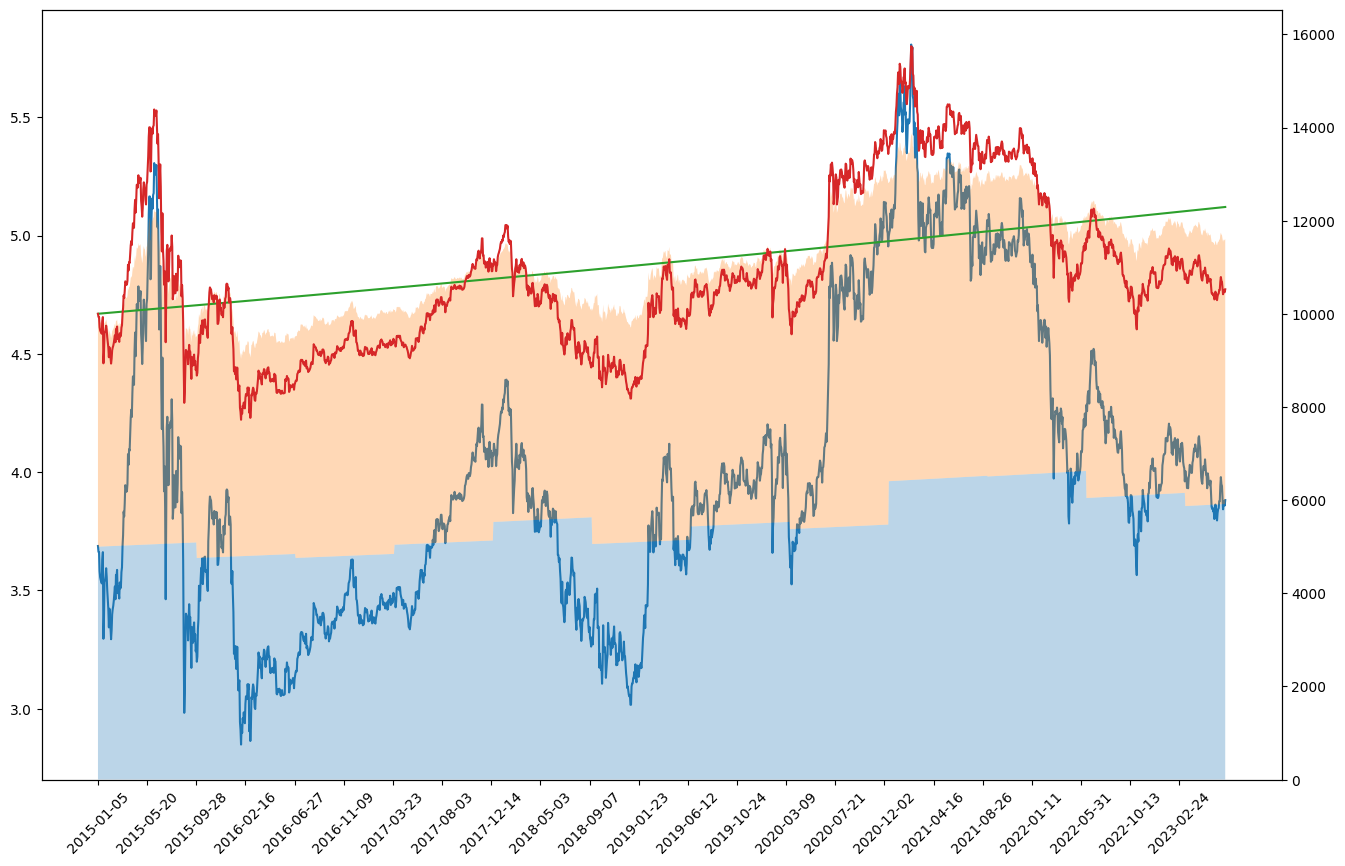

In [59]:
# draw
date = list(df.日期)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.收盘)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

12541.230607307582
12293.55041906846
10526.030368763557


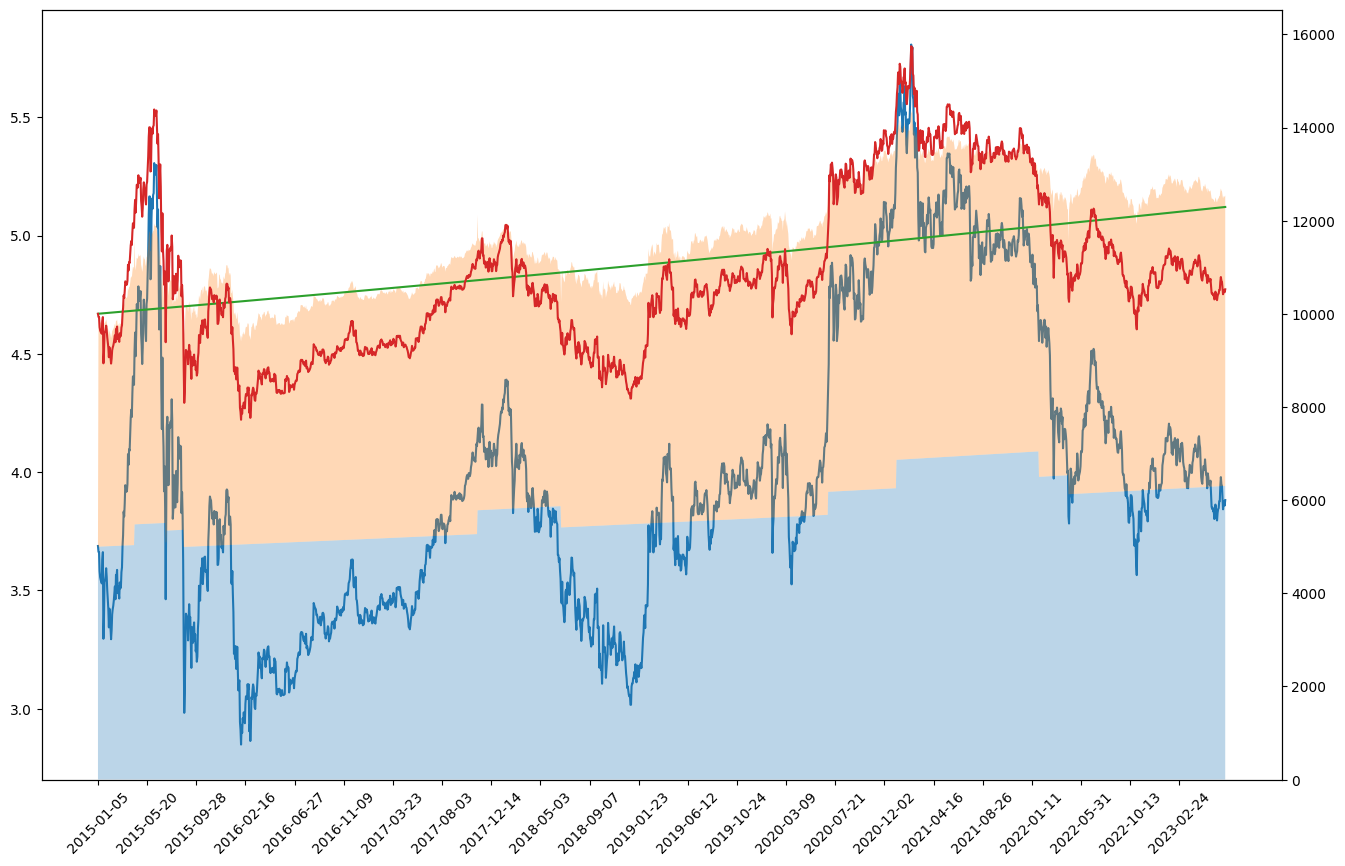

In [60]:
# 按比例触发再平衡
def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

money = 10000
asset = money
stock = 0
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 360
df = ak.fund_etf_hist_em(symbol="510300", period="daily", start_date="20150101", end_date="20230701", adjust="")
# print(df)
for price in df.收盘:
    days -= 1
    stock_p = stock * price
    if (money == 0 or stock == 0) or (money / stock_p > 1.2 or stock_p / money > 1.2):
#     if days < 0:
        money, stock = rebalance(asset, price)
        days = interval
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    if allin_stock == 0:
        allin_stock = 10000 / price
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)

# draw
date = list(df.日期)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.收盘)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

85521.54923312148
86784.94833020719
77028.86448480787
77000


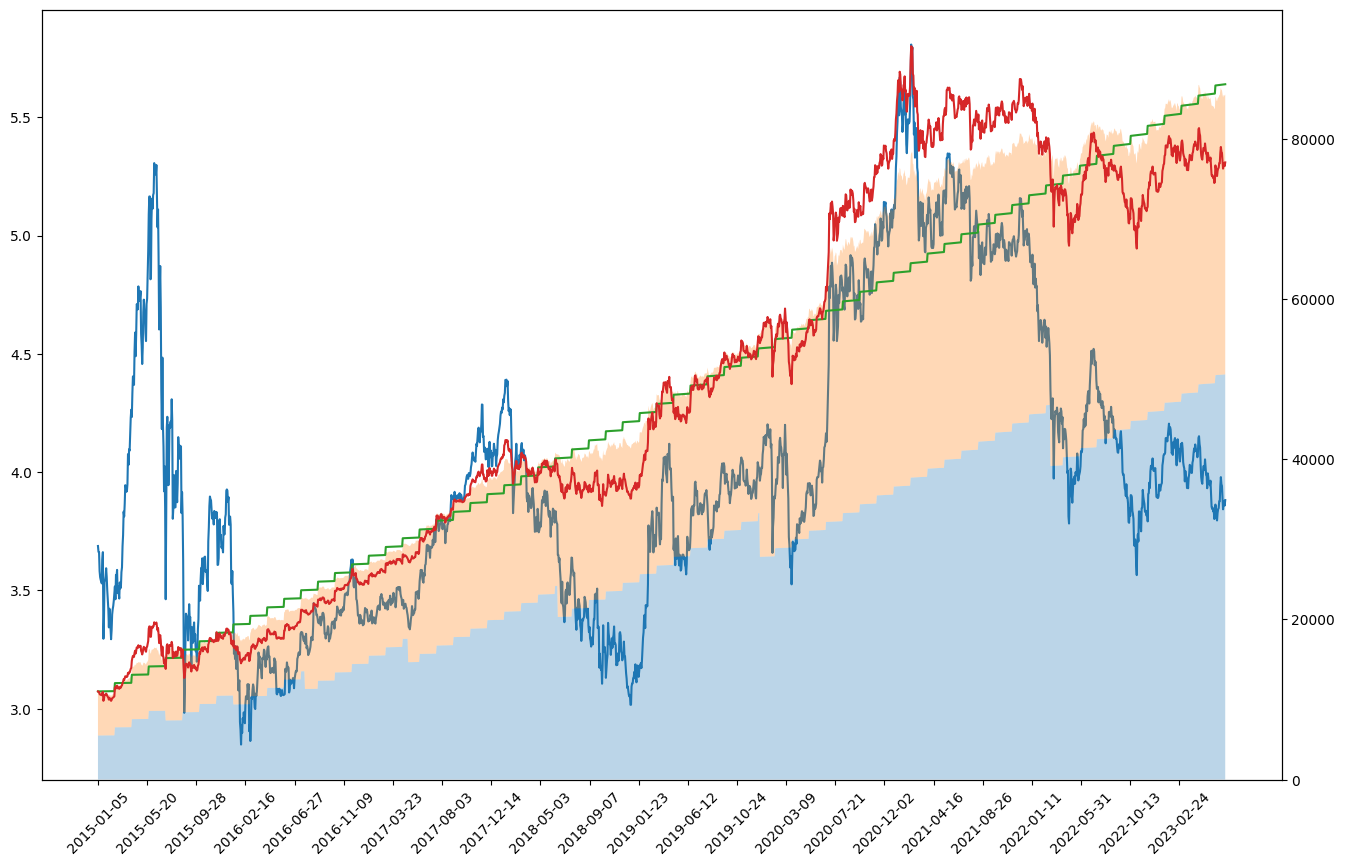

In [61]:
# 与定投结合
def rebalance(asset, price):
    money = asset * 0.5
    stock = money / price
    return money, stock

money = 10000
cost = money
asset = money
stock = 0
hist_money = []
hist_stock = []
hist_allin_money = []
hist_allin_stock = []
allin_money = 10000
allin_stock = 0
days = 0
interval = 30
df = ak.fund_etf_hist_em(symbol="510300", period="daily", start_date="20150101", end_date="20230701", adjust="")
# print(df)

for price in df.收盘:
    days -= 1
    stock_p = stock * price
    if allin_stock == 0:
        allin_stock = 10000 / price
    if days < 0:
        days = interval
        cost += 1000
        money += 1000
        allin_money += 1000
        allin_stock += (1000/price)
        asset = money + stock_p
    if (money == 0 or stock == 0) or (money / stock_p > 1.5 or stock_p / money > 1.5):
#     if days < 0:
        money, stock = rebalance(asset, price)
        stock_p = stock * price
    money *= 1.0001
    asset = money + stock_p
    hist_money.append(money)
    hist_stock.append(stock_p)
    # 对比
    allin_money *= 1.0001
    hist_allin_money.append(allin_money)
    hist_allin_stock.append(allin_stock * price)

print(asset)
print(allin_money)
print(allin_stock * price)
print(cost)

# draw
date = list(df.日期)

fig, left_axis = plt.subplots()
fig.set_size_inches(16, 10)
right_axis = left_axis.twinx()

p1 = left_axis.plot(date, df.收盘)
p2 = right_axis.stackplot(date, hist_money, hist_stock, alpha=0.3)
p3 = right_axis.plot(date, hist_allin_money)
p4 = right_axis.plot(date, hist_allin_stock)

xticks = list(range(0, len(date), 90))
xlabels = [date[x] for x in xticks]
left_axis.set_xticks(xticks)
left_axis.set_xticklabels(xlabels, rotation=45)
plt.show()

In [62]:
import random
import datetime

def calc_rate(asset, days):
    r = asset / 10000 - 1
    return (r / (days / 240) * 100)

rate1 = []
rate2 = []
rate3 = []
for i in range(1000):
    print(i)
    money = 10000
    asset = money
    stock = 0
    hist_money = []
    hist_stock = []
    hist_allin_money = []
    hist_allin_stock = []
    allin_money = 10000
    allin_stock = 0
    days = 0
    interval = 180
    date_s = datetime.date.today() - datetime.timedelta(days=random.randint(2000,5000))
    date_e = date_s + datetime.timedelta(days=random.randint(1000, 5000))
    date_s = date_s.strftime('%Y%m%d')
    date_e = date_e.strftime('%Y%m%d')
#     print(date_s,date_e)
    df = ak.fund_etf_hist_em(symbol="510300", period="daily", start_date=date_s, end_date=date_e, adjust="")
    # print(df)
    for price in df.收盘:
        days -= 1
        stock_p = stock * price
        if (money == 0 or stock == 0) or (money / stock_p > 1.2 or stock_p / money > 1.2):
    #     if days < 0:
            money, stock = rebalance(asset, price)
            days = interval
        money *= 1.0001
        asset = money + stock_p
        hist_money.append(money)
        hist_stock.append(stock_p)
        # 对比
        allin_money *= 1.0001
        hist_allin_money.append(allin_money)
        if allin_stock == 0:
            allin_stock = 10000 / price
        hist_allin_stock.append(allin_stock * price)

    days = len(df['日期'])
    print(df['日期'].iloc[0], df['日期'].iloc[-1], days)
    print(int(asset), int(allin_money), int(allin_stock * price))
    r1 = calc_rate(asset, days)
    r2 = calc_rate(allin_money, days)
    r3 = calc_rate(allin_stock * price, days)
    rate1.append(r1)
    rate2.append(r2)
    rate3.append(r3)
    print(r1, r2, r3)
    print('=====================')

print(sum(rate1)/len(rate1), sum(rate2)/len(rate2), sum(rate3)/len(rate3))

0
2012-05-28 2017-09-29 1305
13905 11393 14984
7.182813520920757 2.5635035557119568 9.167152214983137
1
2017-06-05 2023-07-28 1498
11345 11615 11740
2.1551511334672444 2.588943113418249 2.7881330952091927
2
2017-03-08 2022-10-10 1359
10901 11455 10982
1.5916151053356797 2.5705880361860096 1.7352912947499763
3
2012-11-22 2018-03-21 1295
15372 11382 18296
9.956300533186708 2.5621944417023643 15.375623509378602
4
2015-05-20 2023-07-28 1995
11608 12207 8594
1.9344865281756847 2.656000395803498 -1.690259877456159
5
2013-12-23 2022-01-07 1961
17151 12166 20998
8.752405798200819 2.651340773754431 13.460945356876586
6
2012-05-28 2022-07-18 2467
16263 12797 16670
6.093372140028173 2.72180946759908 6.489346003186768
7
2017-12-07 2023-07-28 1370
11205 11468 10114
2.1125468742154525 2.5720343351499473 0.2003578856435568
8
2014-01-20 2023-07-28 2318
16379 12608 18390
6.6049772071127295 2.7008067407150804 8.687416819700209
9
2015-09-21 2020-11-10 1250
12326 11331 15037
4.467094918818602 2.5563143305

2013-03-06 2017-11-14 1144
14209 11211 15468
8.83120153971229 2.542533620666992 11.471492057862903
654
2009-10-09 2018-11-02 2207
12729 12469 10399
2.968682136903623 2.685298021566723 0.43495073735626166
655
2007-08-08 2018-11-02 2735
12964 13145 7048
2.6010141714172526 2.760126221233292 -2.5900817931387543
656
2011-03-07 2014-02-17 714
8920 10740 6932
-3.629129499665329 2.487627236999243 -10.310914868900017
657
2005-05-30 2013-11-01 2048
19883 12272 27874
11.582607267858426 2.6632853678691766 20.946541429506432
658
2009-01-19 2016-11-11 1899
16076 12091 16980
7.679662381506852 2.642871391930708 8.82188012913357
659
2010-07-15 2018-11-02 2019
14273 12237 12611
5.079803310266094 2.659296009571175 3.1048857675522035
660
2009-03-23 2018-11-02 2341
14992 12637 13487
5.118525438925524 2.704034907578919 3.57585427358924
661
2009-02-27 2018-11-02 2357
15982 12657 15371
6.091816852064894 2.706283565955599 5.469475124622683
662
2010-12-27 2017-10-27 1662
13697 11807 12975
5.339719996679531 2.61

2005-08-29 2017-08-30 2920
28407 13390 41796
15.129427118917288 2.7869874097084097 26.134239318146086
719
2013-03-18 2018-11-02 1372
13345 11470 13147
5.852286144795399 2.5722974138484904 5.506538810959447
720
2012-04-16 2015-06-24 776
14266 10806 18959
13.194277765909415 2.495446493634691 27.708338306328038
721
2009-10-28 2018-11-02 2194
12460 12453 9882
2.6918591896620807 2.683489318370549 -0.12840215994578127
722
2006-05-29 2018-11-02 3029
22280 13537 24081
9.730420731240793 2.8029732186436394 11.157454315592187
723
2005-09-08 2016-05-05 2588
25355 12953 33643
14.240065470480815 2.7390226558437636 21.92619638001213
724
2010-05-04 2016-03-18 1427
11910 11533 10505
3.2132798155586264 2.5795459984269 0.8494948273468541
725
2005-04-18 2009-05-18 993
19948 11043 29162
24.04392479737778 2.5230715693509684 46.3135909468315
726
2009-12-04 2018-11-02 2167
11776 12419 9030
1.9677727046392608 2.6797378755833474 -1.0737535794429909
727
2009-12-24 2014-02-24 1006
8683 11058 6439
-3.1414569598223

2012-01-12 2018-11-02 1655
13722 11799 13511
5.397477453029401 2.609883249088418 5.091624816691194
784
2011-07-26 2016-02-19 1108
11191 11171 10247
2.5798671993039246 2.5378757007804653 0.5369026362603174
785
2008-03-17 2017-08-24 2300
13880 12585 9418
4.04932350555845 2.6982838651554406 -0.6069114698188981
786
2013-02-20 2018-11-02 1390
12809 11491 12174
4.851562943040834 2.5746667191578867 3.754027237316798
787
2013-01-22 2017-02-03 978
12843 11027 12955
6.976872996028565 2.5211490201835107 7.253480849157808
788
2008-05-05 2018-11-02 2557
13198 12913 8112
3.0019135915402644 2.7345991522466275 -1.7716108815635963
789
2012-10-22 2018-08-09 1414
13912 11518 14509
6.641007474550492 2.5778302695224466 7.654031041287709
790
2007-02-05 2015-03-02 1958
15301 12162 15852
6.497864733955941 2.6509301456690717 7.173047951878973
791
2009-12-25 2013-11-21 944
9025 10989 7036
-2.4774525070859132 2.5167984100058343 -7.533272044943668
792
2011-05-30 2015-07-13 1002
12546 11053 14255
6.098264184755926

2006-09-21 2017-09-05 2665
24408 13053 27801
12.975421551406127 2.7500505484825015 16.03106643353878
849
2007-01-04 2018-11-02 2879
18239 13336 15917
6.868752134367664 2.781005118134141 4.932799474352537
850
2011-04-26 2015-06-25 1013
12895 11066 14566
6.860214509388266 2.525637985202729 10.819995712263712
851
2011-06-29 2016-06-03 1200
11430 11274 10630
2.8603272023146564 2.549801741390123 1.2609285473823162
852
2006-06-07 2009-05-05 711
16630 10736 20655
22.38206598644202 2.487249709951512 35.96816064302311
853
2012-03-05 2018-11-02 1623
13165 11762 12356
4.680585350691221 2.6055971610863153 3.4851286760405475
854
2009-03-13 2015-06-24 1527
16179 11649 22127
9.712842792405347 2.59279434063425 19.061522996595333
855
2007-04-06 2010-12-31 913
12416 10955 10525
6.353401689706247 2.512840329297061 1.382006939642816
856
2008-04-28 2018-08-16 2510
13347 12852 8786
3.200755732275038 2.72791032541291 -1.1600306468907364
857
2005-05-09 2015-09-18 2525
25387 12872 35760
14.626171126000628 2.73

2008-05-05 2016-10-14 2055
12742 12281 8150
3.2024308949632587 2.6642494918521744 -2.159462931752479
914
2006-12-25 2015-04-24 2023
18483 12242 24251
10.064937785833028 2.659845799825077 16.90755884452208
915
2008-11-17 2018-11-02 2424
16268 12742 16557
6.205986405376927 2.7157264254588407 6.492128263963158
916
2005-05-30 2018-08-30 3230
27165 13812 39166
12.754288371304806 2.832765660463076 21.671399649220987
917
2005-09-14 2014-11-28 2235
22521 12504 28951
13.446028817626729 2.6891991146950835 20.350320918942675
918
2009-09-21 2017-12-01 1992
13812 12204 12460
4.593562525195738 2.6555888207938727 2.964698036677032
919
2012-04-05 2018-11-02 1603
12919 11738 13093
4.37105222780005 2.6029230575592837 4.632018872161171
920
2010-11-22 2015-04-17 1069
12962 11128 14489
6.651415146002833 2.5328423347126297 10.080441515127928
921
2011-07-05 2014-05-16 693
9122 10717 6872
-3.0402623685724155 2.484986141788176 -10.831037124071553
922
2007-12-05 2015-05-08 1803
11975 11975 9179
2.63005021160420

2011-03-08 2018-11-02 1865
12120 12050 9858
2.728182913033105 2.638241965029743 -0.18203308807717478
979
2011-08-12 2016-07-22 1201
12209 11276 11216
4.415457380685858 2.5499317784155777 2.4310607556229806
980
2005-10-11 2012-06-21 1630
19982 11770 27314
14.697960677533434 2.6065339511850234 25.49407541745834
981
2008-07-02 2015-11-12 1790
14438 11960 14058
5.951486045086227 2.628067582708353 5.441998028261585
982
2007-02-26 2010-06-01 800
12256 10832 10136
6.768390007447611 2.4984820447259066 0.41019987590852564
983
2012-06-11 2018-08-31 1519
13451 11640 13034
5.452894078390922 2.591731180078145 4.794074799245722
984
2008-06-02 2018-11-02 2537
13671 12887 9074
3.4732997894850266 2.731750228027706 -0.8755468829242419
985
2008-04-30 2018-11-02 2558
13347 12914 8310
3.141036969918017 2.7347417002728145 -1.585089370994709
986
2006-03-09 2018-11-02 3081
26819 13608 32760
13.102180041648378 2.8106415088892343 17.729558099542242
987
2011-03-17 2018-11-02 1858
12819 12041 10291
3.641376251755

2.625572318198518
0.07939398683899883
5.418540429698981


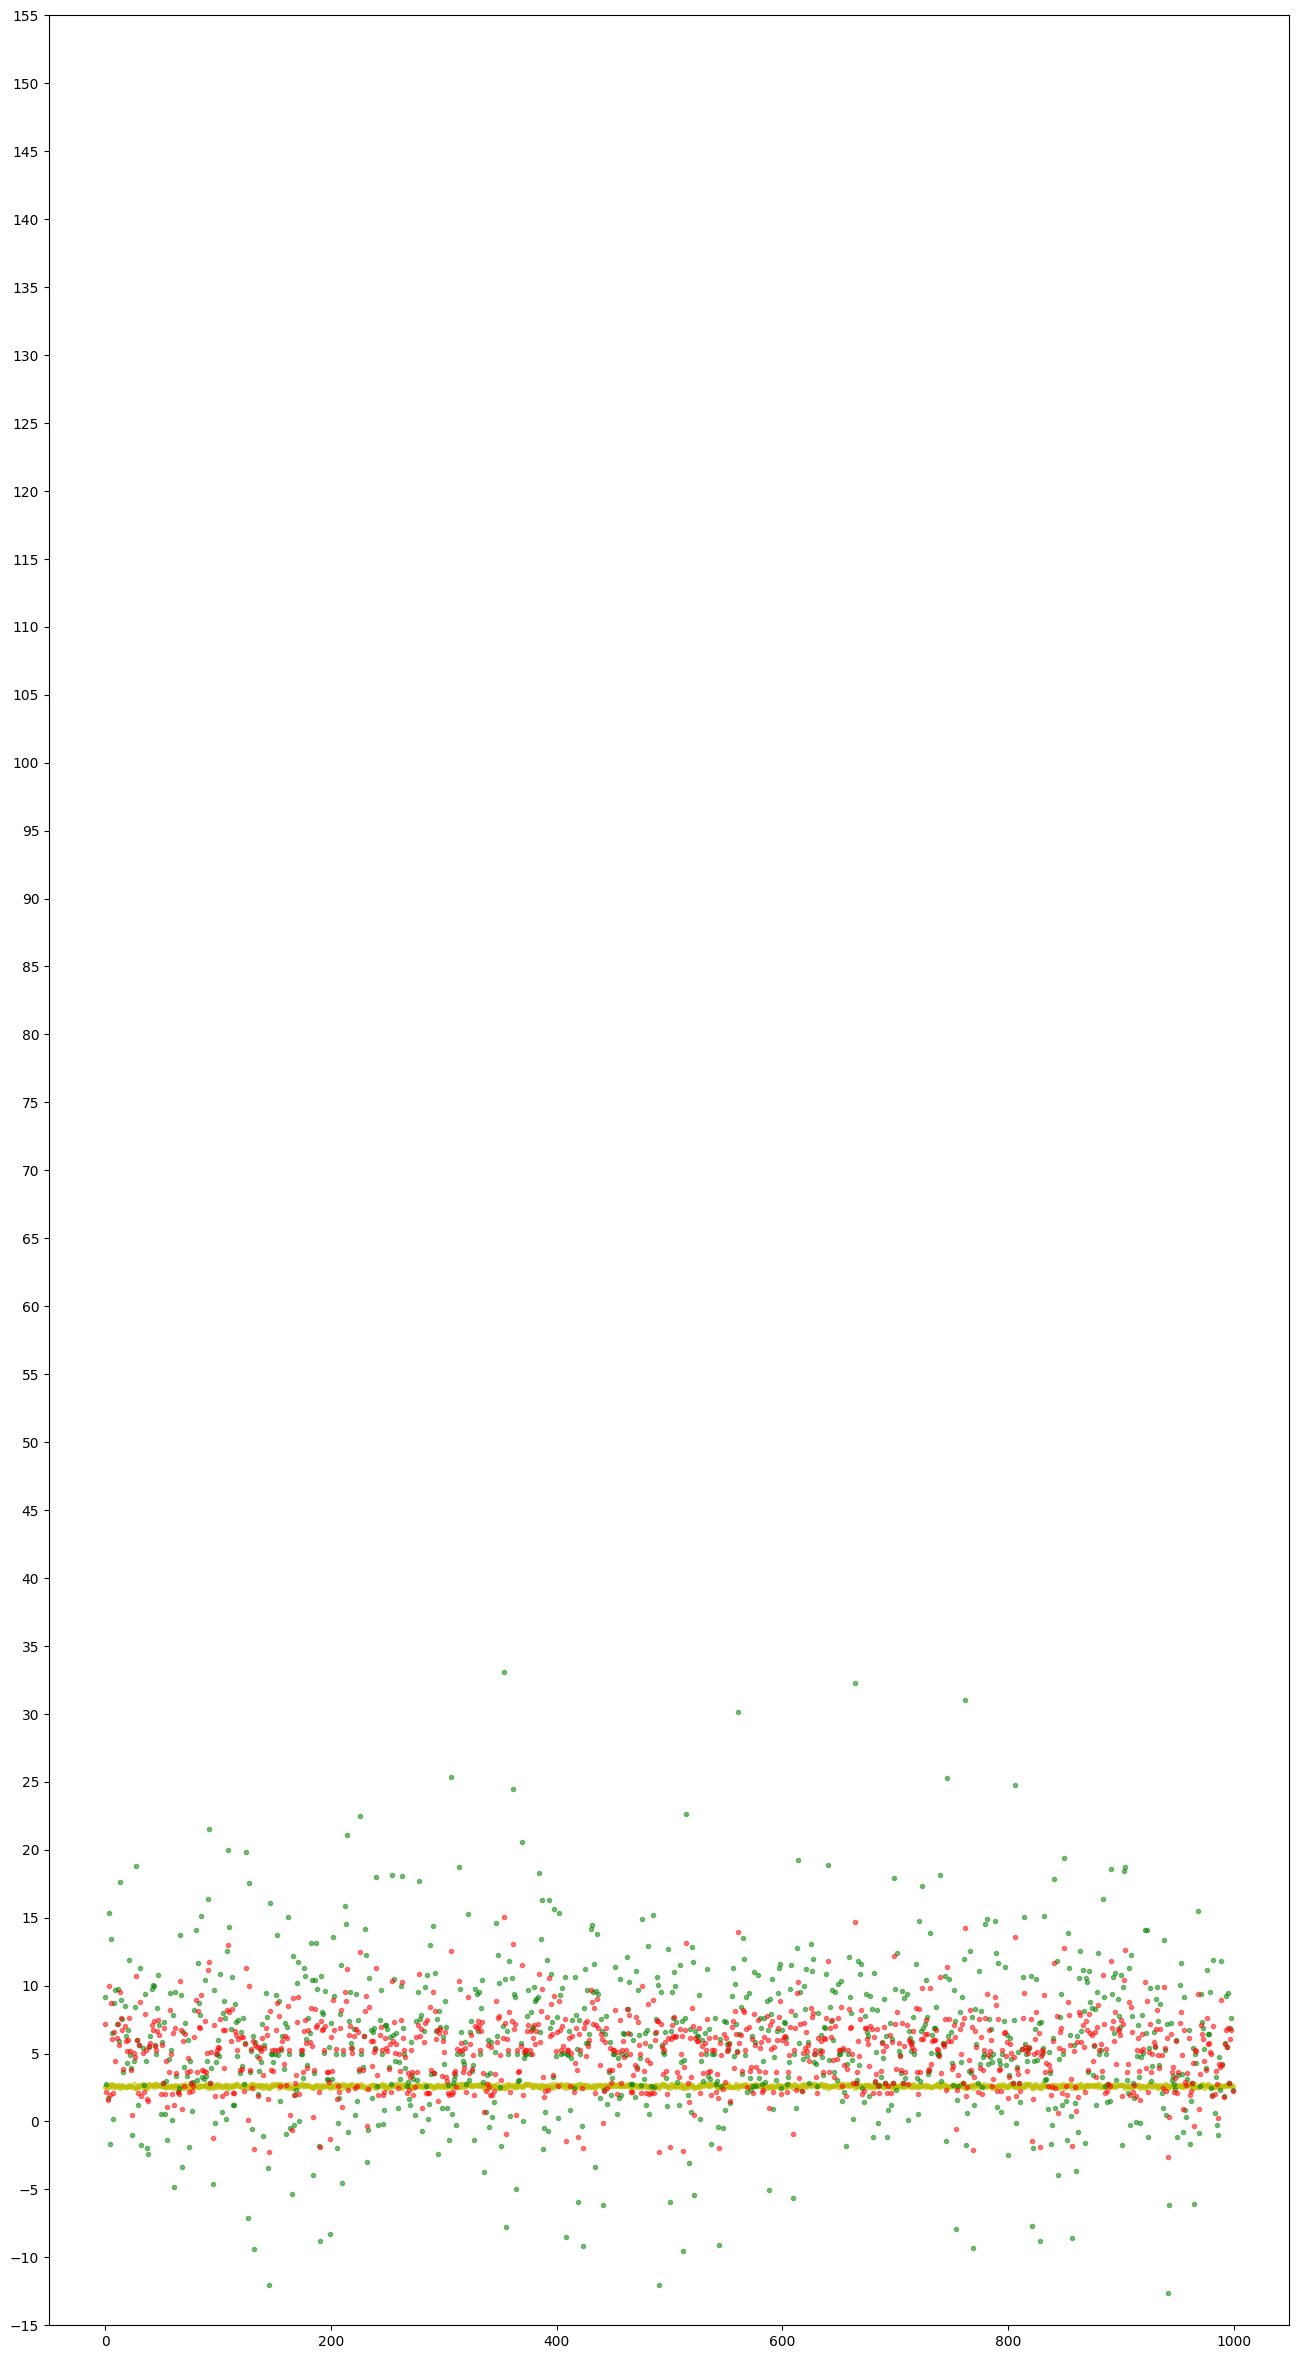

In [63]:
import numpy as np
print(np.std(rate1))
print(np.std(rate2))
print(np.std(rate3))

n = range(1000)
plt.scatter(n, rate2, marker='.', c='y' ,alpha=0.5)
plt.scatter(n, rate3, marker='.', c='g' ,alpha=0.5)
plt.scatter(n, rate1, marker='.', c='r' ,alpha=0.5)

fig = plt.gcf()
fig.set_size_inches(16, 30)
plt.yticks(np.arange(-15, 160, 5))
plt.show()